<a href="https://colab.research.google.com/github/bala909/DIGITAL-PORTFOIO/blob/main/audible_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/audible_uncleaned.csv")
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         30113 non-null  object
 1   author       30112 non-null  object
 2   narrator     30112 non-null  object
 3   time         30112 non-null  object
 4   releasedate  30112 non-null  object
 5   language     30112 non-null  object
 6   stars        30112 non-null  object
 7   price        30112 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [ ]:
df.loc[df.duplicated()]

,name,author,narrator,time,releasedate,language,stars,price


In [ ]:
df.loc[df.duplicated(subset='name', keep=False)].sort_values(by='name')

,name,author,narrator,time,releasedate,language,stars,price
23134,#Girlboss,Writtenby:SophiaAmoruso,Narratedby:SarahJesAustell,4 hrs and 40 mins,06-08-15,English,4 out of 5 stars7 ratings,615.00
27243,#Girlboss,Writtenby:SophiaAmoruso,Narratedby:AudreyFiorini,4 hrs and 53 mins,26-09-18,french,Not rated yet,755.00
19366,101 Amazing Facts About Jane Austen,"Writtenby:JackGoldstein,IsabellaReese",Narratedby:KentHarris,32 mins,18-09-18,English,Not rated yet,303.00
18696,101 Amazing Facts About Jane Austen,"Writtenby:JackGoldstein,IsabellaReese",Narratedby:DrewBowles,27 mins,04-09-20,English,Not rated yet,303.00
17917,12 anni schiavo,Writtenby:SolomonNorthup,Narratedby:LorenzoLoreti,1 hr and 4 mins,18-01-21,italian,Not rated yet,Free
...,...,...,...,...,...,...,...,...
2354,Zeus the Mighty,Writtenby:CrispinBoyer,Narratedby:RamonDeOcampo,3 hrs and 8 mins,18-10-19,English,Not rated yet,469.00
19039,Александр Сергеевич Пушкин,Writtenby:ЕвгенийЗамятин,Narratedby:ВсеволодКузнецов,5 hrs and 27 mins,14-07-20,russian,Not rated yet,166.00
18960,Александр Сергеевич Пушкин,Writtenby:ВикентийВересаев,Narratedby:ВсеволодКузнецов,5 hrs and 27 mins,29-01-21,russian,Not rated yet,166.00
12599,Разговорный английский с English Spot,Writtenby:КристинаБьорн,Narratedby:ЕкатеринаКабашёва,1 hr and 21 mins,07-02-22,russian,Not rated yet,99.00


In [ ]:
df.loc[df.duplicated(subset=['name', 'narrator', 'language'], keep=False)].sort_values(by='name')

,name,author,narrator,time,releasedate,language,stars,price
17917,12 anni schiavo,Writtenby:SolomonNorthup,Narratedby:LorenzoLoreti,1 hr and 4 mins,18-01-21,italian,Not rated yet,Free
18208,12 anni schiavo,Writtenby:SolomonNorthup,Narratedby:LorenzoLoreti,8 hrs and 30 mins,04-05-16,italian,Not rated yet,574.00
21961,81 Days Below Zero,"Writtenby:BrianMurphy,ToulaVlahou",Narratedby:RichardFerrone,8 hrs and 42 mins,02-06-15,English,Not rated yet,820.00
21824,81 Days Below Zero,Writtenby:BrianMurphy,Narratedby:RichardFerrone,8 hrs and 42 mins,01-10-15,English,Not rated yet,713.00
24625,90 Minutes in Heaven,"Writtenby:DonPiper,CecilMurphey",Narratedby:DonPiper,8 hrs and 15 mins,25-09-15,English,Not rated yet,586.00
...,...,...,...,...,...,...,...,...
18674,Zeitreise,Writtenby:StefanAust,Narratedby:StefanAust,18 hrs and 19 mins,16-06-21,german,Not rated yet,635.00
19039,Александр Сергеевич Пушкин,Writtenby:ЕвгенийЗамятин,Narratedby:ВсеволодКузнецов,5 hrs and 27 mins,14-07-20,russian,Not rated yet,166.00
18960,Александр Сергеевич Пушкин,Writtenby:ВикентийВересаев,Narratedby:ВсеволодКузнецов,5 hrs and 27 mins,29-01-21,russian,Not rated yet,166.00
12599,Разговорный английский с English Spot,Writtenby:КристинаБьорн,Narratedby:ЕкатеринаКабашёва,1 hr and 21 mins,07-02-22,russian,Not rated yet,99.00


In [ ]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [ ]:
df['author'] = df['author'].str.replace('Writtenby:', '')
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [ ]:
df[df['author'].str.contains('Illustrator', na=False)]

,name,author,narrator,time,releasedate,language,stars,price
74,Barnabas der Wolkenschaufler,"SophieSchoenwald,NadineReitz-Illustrator",Narratedby:BerndReheuser,2 hrs and 56 mins,04-04-22,german,Not rated yet,200.00
815,Fabula - Das Portal der dreizehn Reiche,"AkramEl-Bahay,MaxMeinzold-Illustrator",Narratedby:ThomasSchmuckert,10 hrs and 5 mins,25-02-22,german,Not rated yet,334.00
1113,Auf plüschigen Sohlen,"SabineStäding,NadineReitz-Illustrator",Narratedby:JonaMues,1 hr and 58 mins,25-03-22,german,Not rated yet,233.00
1123,Jonas Reise,"PetervonBecker,StellaDreis-Illustrator",Narratedby:UlrichMatthes,4 hrs and 55 mins,28-03-22,german,Not rated yet,367.00
1485,Make Your Bed with Skipper the Seal,"AdmiralWilliamH.McRaven,HowardMcWilliam-Illust...",Narratedby:AdmiralWilliamH.McRaven,9 mins,16-11-21,English,Not rated yet,500.00
1852,Seepferdchen sind ausverkauft,"ConstanzeSpengler,KatjaGehrmann-Illustrator",Narratedby:HelgeHeynold,1 hr and 4 mins,31-08-21,german,Not rated yet,233.00
1855,Große Hilfe für kleine Küken,"KatrinPokahr,SandyThißen-Illustrator",Narratedby:JulianHoreyseck,1 hr and 32 mins,30-09-21,german,Not rated yet,132.00
3157,Stamped (For Kids),"SonjaCherry-Paul-adaptation,RachelleBaker-Illu...",Narratedby:Pe'TehnRaighn-KemJackson,2 hrs and 22 mins,15-06-21,English,Not rated yet,500.00
3914,Definitely Dominguita: Sherlock Dom,"TerryCatasusJennings,FatimaAnaya-Illustrator",Narratedby:FrankieCorzo,1 hr and 53 mins,24-11-21,English,Not rated yet,305.00
6355,The Red Pencil,"AndreaDavisPinkney,ShaneW.Evans-Illustrator",Narratedby:AndreaDavisPinkney,3 hrs and 12 mins,16-09-14,English,Not rated yet,500.00


In [ ]:
# Checking if the percentage of illustrators to see if it's worth making a column for it.
ilst_df = df[df['author'].str.contains('Illustrator', na=False)]
ilst_percentage = (ilst_df.shape[0]/ df.shape[0]) * 100
print(ilst_percentage)

0.04317072360774416


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         30113 non-null  object
 1   author       30112 non-null  object
 2   narrator     30112 non-null  object
 3   time         30112 non-null  object
 4   releasedate  30112 non-null  object
 5   language     30112 non-null  object
 6   stars        30112 non-null  object
 7   price        30112 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [ ]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [ ]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [ ]:
df['narrator'].isnull().sum()

np.int64(1)

In [ ]:
# Converting the time from its previous format to minuts
import re
def convert_time(_str):
    if 'hr' in _str and 'min' in _str:
        hours, mins = map(int, re.findall(r'\d+', _str))
        return hours * 60 + mins
    elif 'hr' in _str:
        hours = int(re.search(r'\d+', _str).group())
        return hours * 60
    elif 'min' in _str:
        mins = int(re.search(r'\d+', _str).group())
        return mins
    else:
        return None

In [ ]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         30113 non-null  object
 1   author       30112 non-null  object
 2   narrator     30112 non-null  object
 3   time         30112 non-null  object
 4   releasedate  30112 non-null  object
 5   language     30112 non-null  object
 6   stars        30112 non-null  object
 7   price        30112 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [ ]:
df['releasedate'] = pd.to_datetime(df['releasedate'])

/tmp/ipython-input-27-1614981251.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'])


In [ ]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         30113 non-null  object        
 1   author       30112 non-null  object        
 2   narrator     30112 non-null  object        
 3   time         30112 non-null  object        
 4   releasedate  30112 non-null  datetime64[ns]
 5   language     30112 non-null  object        
 6   stars        30112 non-null  object        
 7   price        30112 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.8+ MB


In [ ]:
df['language'].unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       nan], dtype=object)

In [ ]:
df['language'] = df['language'].str.capitalize()

In [ ]:
df['language'].unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       nan], dtype=object)

In [ ]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00


In [ ]:
df['numofratings'] = df['stars'].str.extract(r'(\d+)\sratings')[0]
df['stars'] = df['stars'].str.extract(r'(\d+\.?\d*)\sout')[0].astype(float)
df['numofratings'] = df['numofratings'].fillna(0).astype(int)

In [ ]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price,numofratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,5.0,468.00,34
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5,820.00,41
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5,410.00,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,4.5,820.00,181


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          30113 non-null  object        
 1   author        30112 non-null  object        
 2   narrator      30112 non-null  object        
 3   time          30112 non-null  object        
 4   releasedate   30112 non-null  datetime64[ns]
 5   language      30112 non-null  object        
 6   stars         4663 non-null   float64       
 7   price         30112 non-null  object        
 8   numofratings  30113 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].replace('Free', '0')
df['price'] = df['price'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30113 entries, 0 to 30112
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          30113 non-null  object        
 1   author        30112 non-null  object        
 2   narrator      30112 non-null  object        
 3   time          30112 non-null  object        
 4   releasedate   30112 non-null  datetime64[ns]
 5   language      30112 non-null  object        
 6   stars         4663 non-null   float64       
 7   price         30112 non-null  float64       
 8   numofratings  30113 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df.loc[df.duplicated(subset=['name', 'narrator', 'language'], keep=False)].sort_values(by='name')

,name,author,narrator,time,releasedate,language,stars,price,numofratings
17917,12 anni schiavo,SolomonNorthup,LorenzoLoreti,1 hr and 4 mins,2021-01-18,Italian,NaN,0.0,0
18208,12 anni schiavo,SolomonNorthup,LorenzoLoreti,8 hrs and 30 mins,2016-04-05,Italian,NaN,574.0,0
21961,81 Days Below Zero,"BrianMurphy,ToulaVlahou",RichardFerrone,8 hrs and 42 mins,2015-02-06,English,NaN,820.0,0
21824,81 Days Below Zero,BrianMurphy,RichardFerrone,8 hrs and 42 mins,2015-01-10,English,NaN,713.0,0
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,8 hrs and 15 mins,2015-09-25,English,NaN,586.0,0
...,...,...,...,...,...,...,...,...,...
18674,Zeitreise,StefanAust,StefanAust,18 hrs and 19 mins,2021-06-16,German,NaN,635.0,0
19039,Александр Сергеевич Пушкин,ЕвгенийЗамятин,ВсеволодКузнецов,5 hrs and 27 mins,2020-07-14,Russian,NaN,166.0,0
18960,Александр Сергеевич Пушкин,ВикентийВересаев,ВсеволодКузнецов,5 hrs and 27 mins,2021-01-29,Russian,NaN,166.0,0
12599,Разговорный английский с English Spot,КристинаБьорн,ЕкатеринаКабашёва,1 hr and 21 mins,2022-07-02,Russian,NaN,99.0,0


In [ ]:
df_sorted = df.sort_values(by=['name', 'releasedate'], ascending=[True, True])
df_cleaned = df_sorted.drop_duplicates(subset=['name', 'narrator', 'language'], keep='first')
df_cleaned.loc[df_cleaned.duplicated(subset=['name', 'narrator', 'language'], keep=False)].sort_values(by='name')

,name,author,narrator,time,releasedate,language,stars,price,numofratings


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29977 entries, 27841 to 29347
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          29977 non-null  object        
 1   author        29976 non-null  object        
 2   narrator      29976 non-null  object        
 3   time          29976 non-null  object        
 4   releasedate   29976 non-null  datetime64[ns]
 5   language      29976 non-null  object        
 6   stars         4637 non-null   float64       
 7   price         29976 non-null  float64       
 8   numofratings  29977 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['stars'] = pd.to_numeric(df_cleaned['stars'], errors='coerce')

/tmp/ipython-input-43-3528717411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
/tmp/ipython-input-43-3528717411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['stars'] = pd.to_numeric(df_cleaned['stars'], errors='coerce')


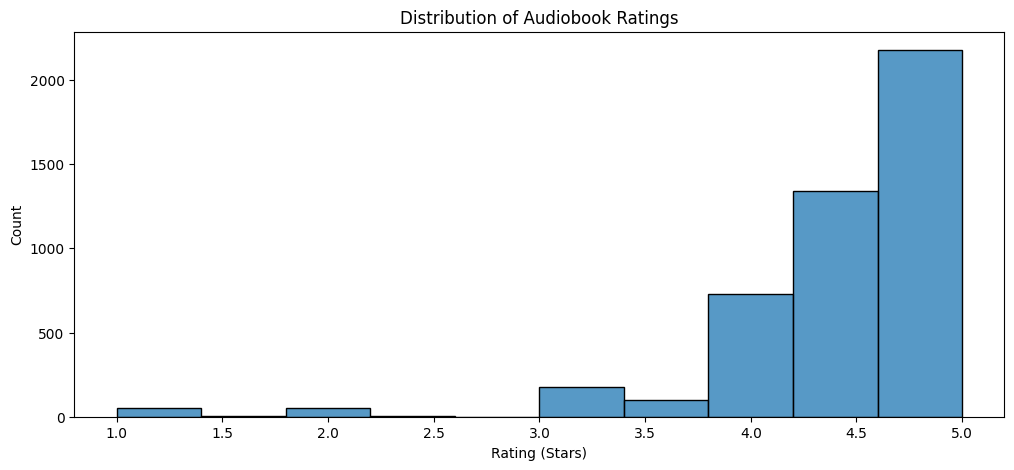

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned['stars'], bins=10)
plt.xlabel("Rating (Stars)")
plt.ylabel("Count")
plt.title("Distribution of Audiobook Ratings")
plt.show()

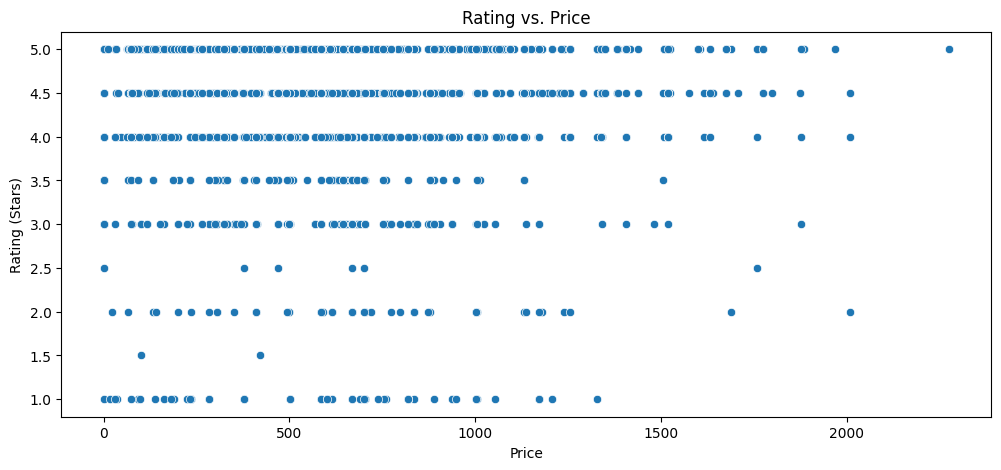

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['stars'])
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.title('Rating vs. Price')
plt.show()

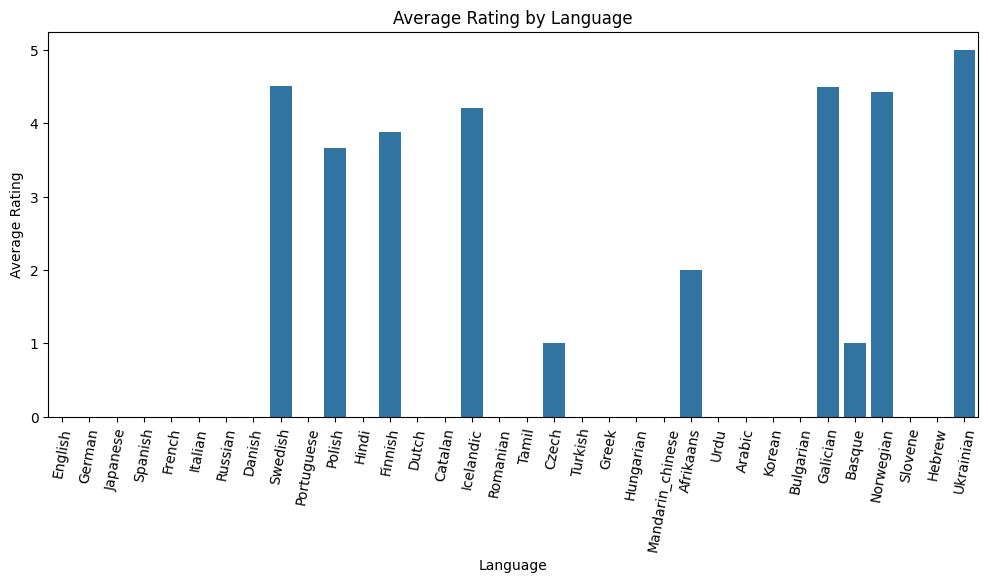

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df_cleaned['language'].value_counts().index,
            y=df_cleaned.groupby('language')['stars'].mean().values)
plt.xlabel("Language")
plt.ylabel("Average Rating")
plt.title("Average Rating by Language")
plt.xticks(rotation=80)
plt.show()

/tmp/ipython-input-47-1797407002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['releaseyear'] = df_cleaned['releasedate'].dt.year


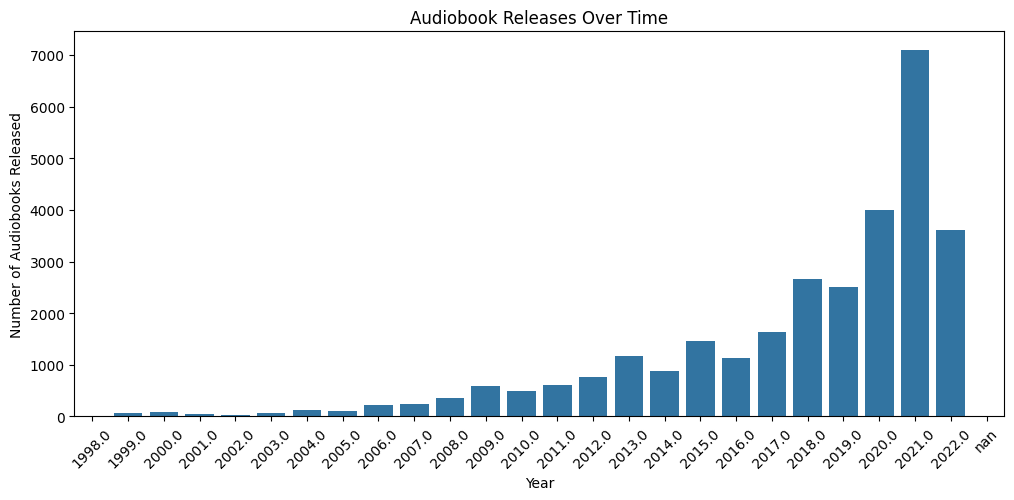

In [ ]:
df_cleaned['releaseyear'] = df_cleaned['releasedate'].dt.year
plt.figure(figsize=(12, 5))
sns.countplot(x=df_cleaned['releaseyear'], order=sorted(df_cleaned['releaseyear'].unique()))
plt.xlabel("Year")
plt.ylabel("Number of Audiobooks Released")
plt.title("Audiobook Releases Over Time")
plt.xticks(rotation=45)
plt.show()

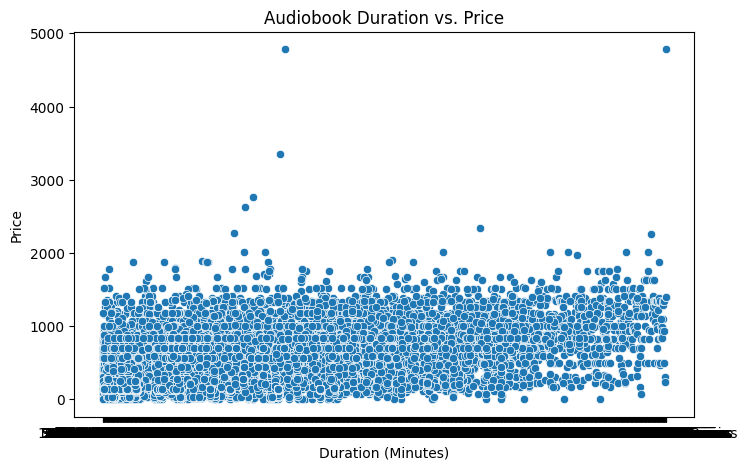

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['time'], y=df_cleaned['price'])
plt.xlabel("Duration (Minutes)")
plt.ylabel("Price")
plt.title("Audiobook Duration vs. Price")
plt.show()

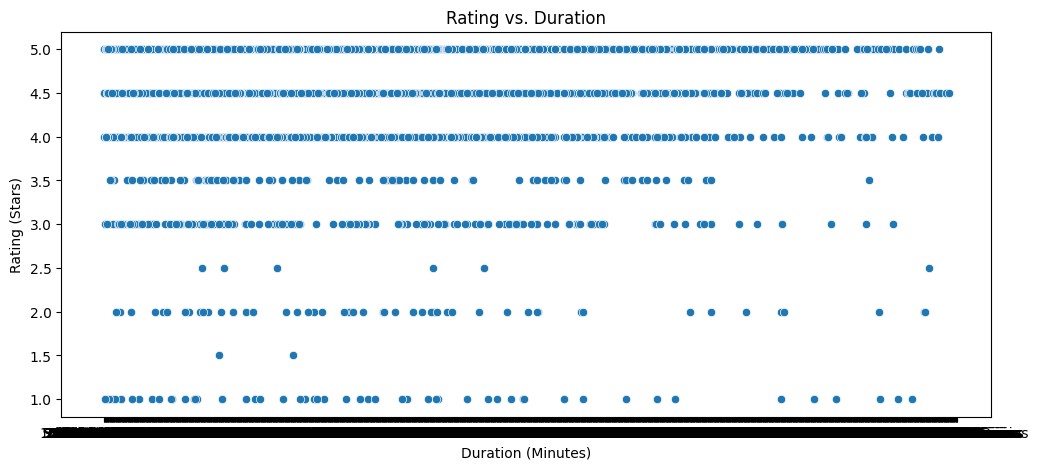

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_cleaned['time'], y=df_cleaned['stars'])
plt.xlabel("Duration (Minutes)")
plt.ylabel("Rating (Stars)")
plt.title("Rating vs. Duration")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30707 (\N{CJK UNIFIED IDEOGRAPH-77F3}) missing from font(s) DejaVu Sans.
  fig.canvas

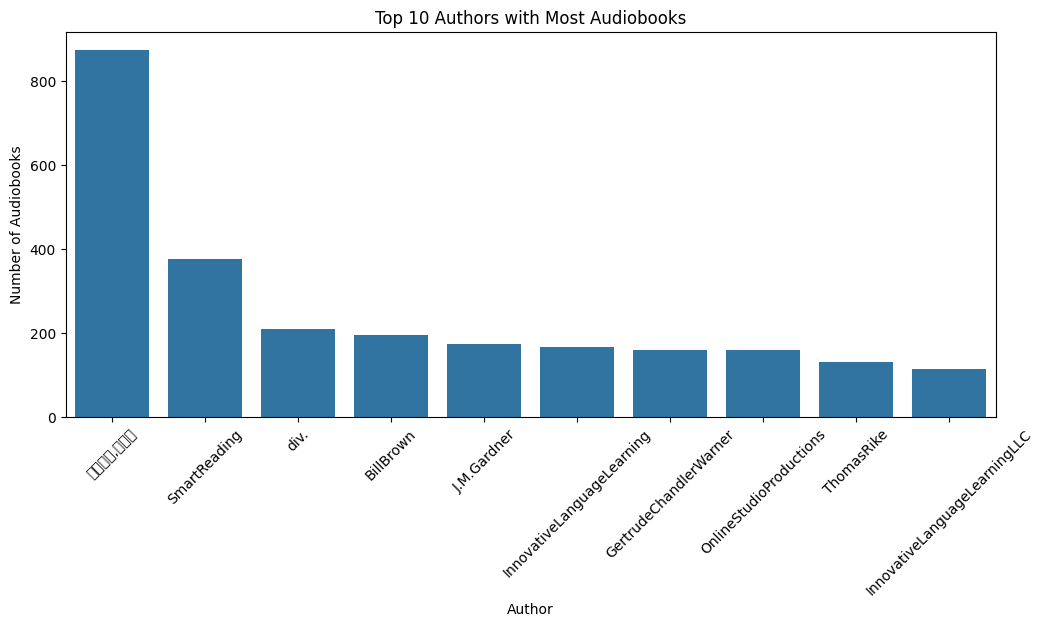

In [ ]:
top_authors = df_cleaned['author'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xlabel("Author")
plt.ylabel("Number of Audiobooks")
plt.title("Top 10 Authors with Most Audiobooks")
plt.xticks(rotation=45)
plt.show()

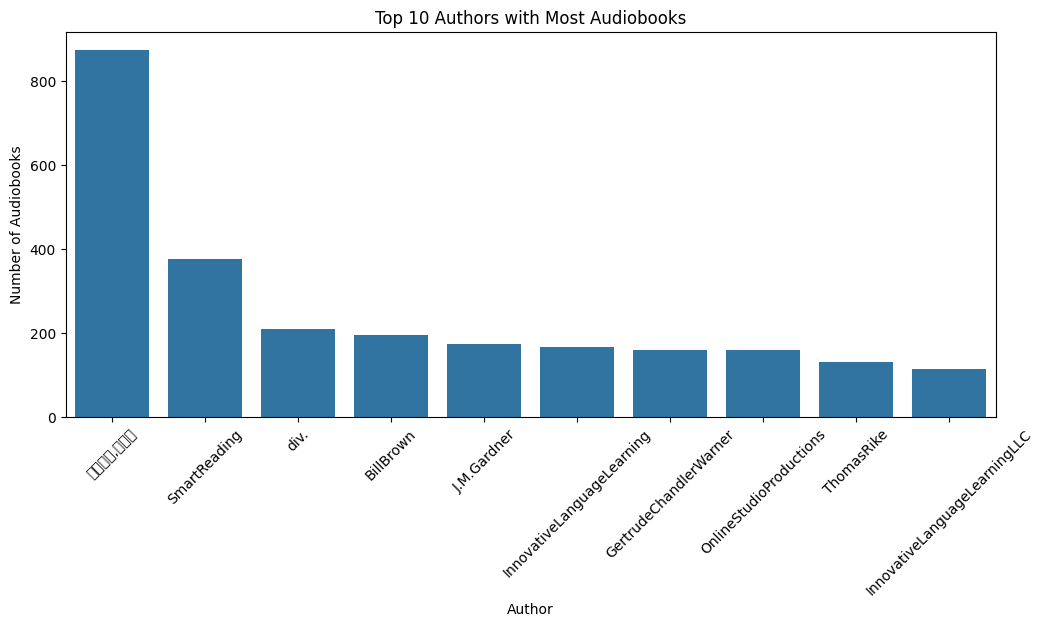

In [ ]:
top_authors = df_cleaned['author'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xlabel("Author")
plt.ylabel("Number of Audiobooks")
plt.title("Top 10 Authors with Most Audiobooks")
plt.xticks(rotation=45)
plt.show()

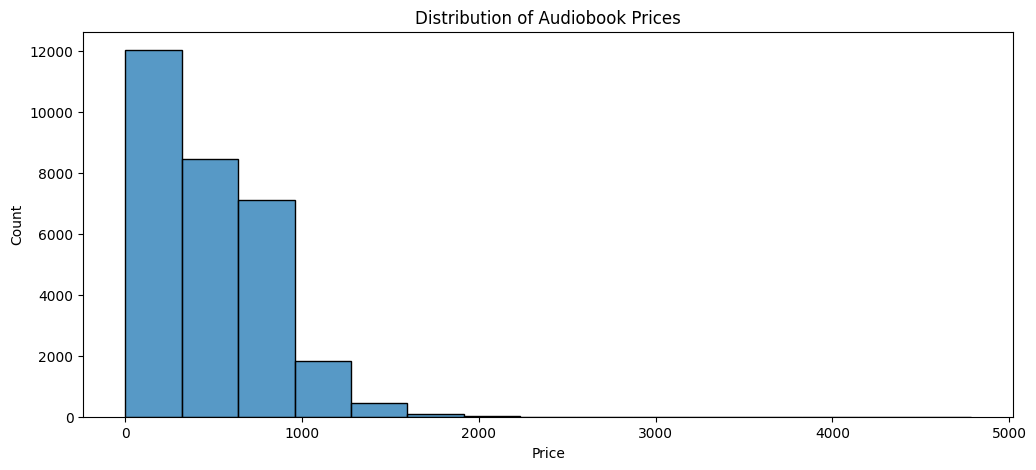

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned['price'], bins=15)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Audiobook Prices")
plt.show()

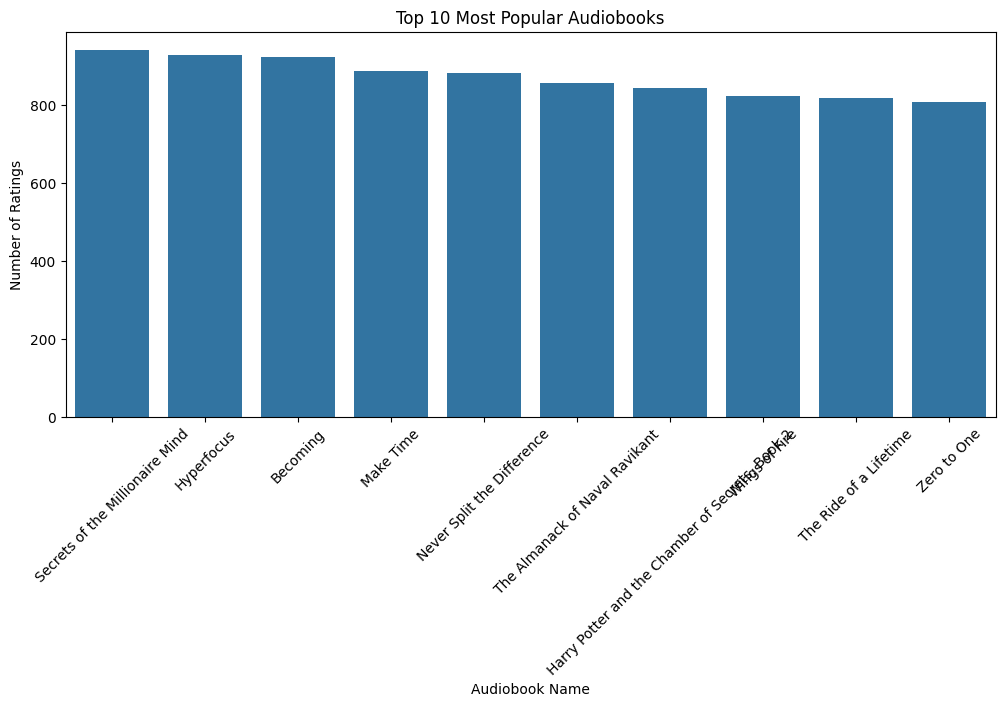

In [ ]:
top_books = df.nlargest(10, 'numofratings')
plt.figure(figsize=(12, 5))
sns.barplot(x=top_books['name'], y=top_books['numofratings'])
plt.xlabel("Audiobook Name")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Popular Audiobooks")
plt.xticks(rotation=45)
plt.show()

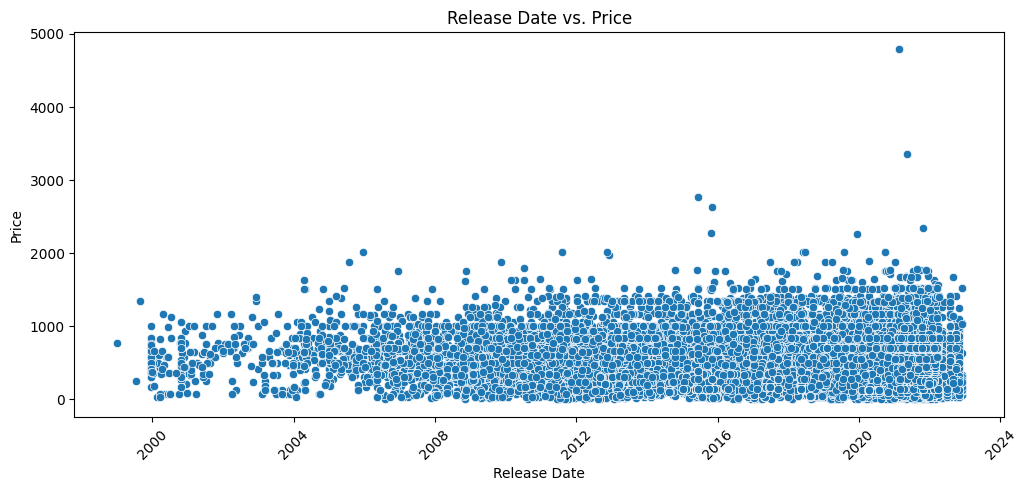

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_cleaned['releasedate'], y=df_cleaned['price'])
plt.xlabel("Release Date")
plt.ylabel("Price")
plt.title("Release Date vs. Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_excel('audible_clean.xlsx')